In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer

In [2]:
# import data set
inputData = pd.read_csv("kidneyChronic.csv")
inputData.head()
inputData.dtypes

age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

In [3]:
# remove any leading or trailing special characters such as \t \n etc.
for col in inputData.columns:
    inputData[col] = inputData[col].str.strip()
inputData.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Replace missing values with np.NaN for further processing of data frames
for input, data_set in inputData.iterrows():        
    for header in inputData:
        if data_set[header] == '?':
            data_set[header] = np.NaN

inputData.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# for each attribute, calculate number of missing values
miss_vals = inputData.isnull().sum()
print(miss_vals)

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [6]:
# Caclulate missing value percetnatge for each attribute
miss_vals_percentage = 100*inputData.isnull().sum()/len(inputData)
print(miss_vals_percentage)

age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.75
wbcc     26.50
rbcc     32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
class     0.00
dtype: float64


In [7]:
# Make a table with the results
miss_val_table = pd.concat([miss_vals, miss_vals_percentage], axis=1)

In [8]:
# set threshold for % of missing values 
miss_values_threshold = 100.0

# remove attributes whih have at least or more % of missing values than the threshold set
for input, data_set in miss_val_table.iterrows():
    if(miss_val_table.loc[input][1] > miss_values_threshold):
        print(input,miss_val_table.loc[input][1])
        del inputData[input]

inputData.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
# Conver Nominal to intergers and Fill missing values
#concert age from string to float
inputData['age'] = inputData['age'].astype(np.float64)
inputData['age_filled'] = inputData['age'].fillna(np.nanmedian(inputData['age']))

#concert age from string to float
inputData['bp'] = inputData['bp'].astype(np.float64)
inputData['bp_filled'] = inputData['bp'].fillna(np.nanmedian(inputData['bp']))

inputData['sg'] = inputData['sg'].astype(np.float64)
inputData['sg_filled'] = inputData['sg'].fillna(np.nanmedian(inputData['sg']))

inputData['al'] = inputData['al'].astype(np.float64)
inputData['al_filled'] = inputData['al'].fillna(np.nanmedian(inputData['al']))

inputData['su'] = inputData['su'].astype(np.float64)
inputData['su_filled'] = inputData['su'].fillna(np.nanmedian(inputData['su']))

inputData[['rbc_filled','pc_filled']] = inputData[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})

inputData[['pcc_filled','ba_filled']] = inputData[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

inputData['bgr'] = inputData['bgr'].astype(np.float64)
inputData['bgr_filled'] = inputData['bgr'].fillna(np.nanmedian(inputData['bgr']))

inputData['bu'] = inputData['bu'].astype(np.float64)
inputData['bu_filled'] = inputData['bu'].fillna(np.nanmedian(inputData['bu']))

inputData['sc'] = inputData['sc'].astype(np.float64)
inputData['sc_filled'] = inputData['sc'].fillna(np.nanmedian(inputData['sc']))

inputData['sod'] = inputData['sod'].astype(np.float64)
inputData['sod_filled'] = inputData['sod'].fillna(np.nanmedian(inputData['sod']))

inputData['pot'] = inputData['pot'].astype(np.float64)
inputData['pot_filled'] = inputData['pot'].fillna(np.nanmedian(inputData['pot']))

inputData['hemo'] = inputData['hemo'].astype(np.float64)
inputData['hemo_filled'] = inputData['hemo'].fillna(np.nanmedian(inputData['hemo']))

inputData['pcv'] = inputData['pcv'].astype(np.float64)
inputData['pcv_filled'] = inputData['pcv'].fillna(np.nanmedian(inputData['pcv']))

inputData['wbcc'] = inputData['wbcc'].astype(np.float64)
inputData['wbcc_filled'] = inputData['wbcc'].fillna(np.nanmedian(inputData['wbcc']))

inputData['rbcc'] = inputData['rbcc'].astype(np.float64)
inputData['rbcc_filled'] = inputData['rbcc'].fillna(np.nanmedian(inputData['rbcc']))

inputData[['htn_filled','dm_filled','cad_filled','pe_filled','ane_filled']] = inputData[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
inputData[['appet_filled']] = inputData[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
inputData['class_filled'] = inputData['class'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})


In [10]:
miss_vals = inputData.isnull().sum()
print(miss_vals[25:-1])

age_filled        0
bp_filled         0
sg_filled         0
al_filled         0
su_filled         0
rbc_filled      152
pc_filled        65
pcc_filled        4
ba_filled         4
bgr_filled        0
bu_filled         0
sc_filled         0
sod_filled        0
pot_filled        0
hemo_filled       0
pcv_filled        0
wbcc_filled       0
rbcc_filled       0
htn_filled        2
dm_filled         2
cad_filled        2
pe_filled         1
ane_filled        1
appet_filled      1
dtype: int64


In [11]:
#plt.plot(inputData["rbc_filled"])
#plt.show()
#print(inputData["rbc_filled"])
inputData["rbc_filled"] = inputData["rbc_filled"].fillna(-1)
inputData["pc_filled"] = inputData["pc_filled"].fillna(-1)

In [12]:
inputData["pcc_filled"]=inputData["pcc_filled"].fillna(-1)
inputData["ba_filled"] = inputData["ba_filled"].fillna(-1)

In [13]:
inputData["htn_filled"]=inputData["htn_filled"].fillna(-1)
inputData["dm_filled"]=inputData["dm_filled"].fillna(-1)
inputData["cad_filled"]=inputData["cad_filled"].fillna(-1)
inputData["pe_filled"]=inputData["pe_filled"].fillna(-1)
inputData["ane_filled"]=inputData["ane_filled"].fillna(-1)
inputData["appet_filled"]=inputData["appet_filled"].fillna(-1)

In [14]:
# copy curated data into a separate data frame
col = inputData.columns
curatedInput = inputData[col[25:]]        
    
miss_vals = curatedInput.isnull().sum()

#print(miss_vals)
print(curatedInput.shape)
#print(curatedInput)
curatedInput.to_csv('tmp_ci.csv')
curatedInput.dtypes

(400, 25)


age_filled      float64
bp_filled       float64
sg_filled       float64
al_filled       float64
su_filled       float64
rbc_filled      float64
pc_filled       float64
pcc_filled      float64
ba_filled       float64
bgr_filled      float64
bu_filled       float64
sc_filled       float64
sod_filled      float64
pot_filled      float64
hemo_filled     float64
pcv_filled      float64
wbcc_filled     float64
rbcc_filled     float64
htn_filled      float64
dm_filled       float64
cad_filled      float64
pe_filled       float64
ane_filled      float64
appet_filled      int64
class_filled     object
dtype: object

In [15]:
# convert all DataFrame columns to the int64 dtype
curatedInput = curatedInput.astype(int)
curatedInput.dtypes

age_filled      int32
bp_filled       int32
sg_filled       int32
al_filled       int32
su_filled       int32
rbc_filled      int32
pc_filled       int32
pcc_filled      int32
ba_filled       int32
bgr_filled      int32
bu_filled       int32
sc_filled       int32
sod_filled      int32
pot_filled      int32
hemo_filled     int32
pcv_filled      int32
wbcc_filled     int32
rbcc_filled     int32
htn_filled      int32
dm_filled       int32
cad_filled      int32
pe_filled       int32
ane_filled      int32
appet_filled    int32
class_filled    int32
dtype: object

(array([ 6.,  4.,  6.,  5.,  9., 11., 13., 26., 16., 28., 46., 25., 54.,
        45., 37., 38., 21.,  7.,  2.,  1.]),
 array([ 2. ,  6.4, 10.8, 15.2, 19.6, 24. , 28.4, 32.8, 37.2, 41.6, 46. ,
        50.4, 54.8, 59.2, 63.6, 68. , 72.4, 76.8, 81.2, 85.6, 90. ]),
 <a list of 20 Patch objects>)

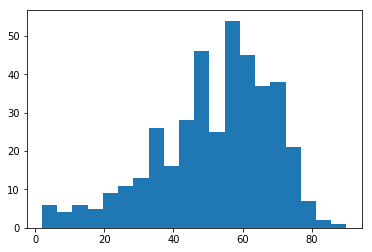

In [16]:
plt.hist(curatedInput["age_filled"],bins=20)

In [17]:
#sns.boxplot(x="type", y="value", data=curatedInput, whis=3.0);

{'whiskers': [<matplotlib.lines.Line2D at 0xbc24d30>,
 'caps': [<matplotlib.lines.Line2D at 0xbc2f6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0xbbdaf98>],
 'medians': [<matplotlib.lines.Line2D at 0xbc2fd68>],
 'fliers': [<matplotlib.lines.Line2D at 0xbc2fe48>],
 'means': []}

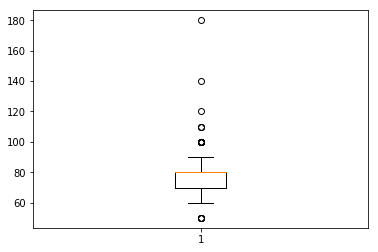

In [18]:
plt.boxplot(curatedInput['bp_filled'])

{'whiskers': [<matplotlib.lines.Line2D at 0xbc87dd8>,
 'caps': [<matplotlib.lines.Line2D at 0xbc93710>,
 'boxes': [<matplotlib.lines.Line2D at 0xbc67320>],
 'medians': [<matplotlib.lines.Line2D at 0xbc93da0>],
 'fliers': [<matplotlib.lines.Line2D at 0xbc93cf8>],
 'means': []}

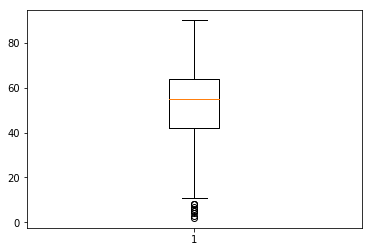

In [19]:
plt.boxplot(curatedInput['age_filled'])

In [20]:
# correlated various attributes with class
corr_input = curatedInput.corr()

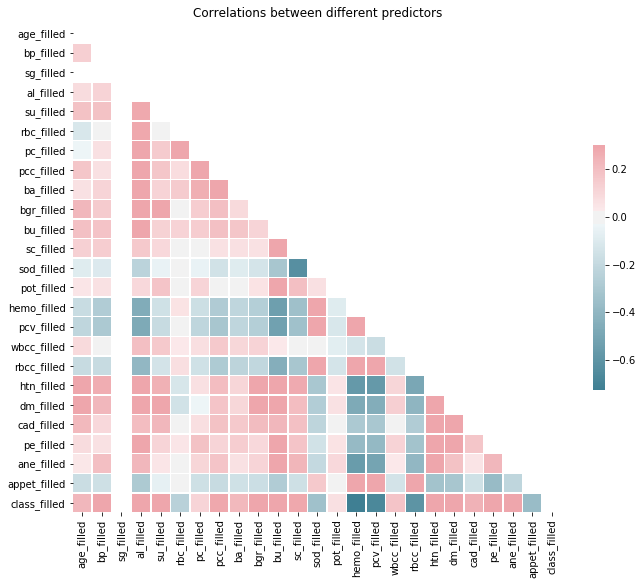

In [21]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_input, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_input, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(curatedInput.iloc[:,:-1], curatedInput['class_filled'], 
                                                    test_size = 0.40, random_state=44,
                                                   stratify= curatedInput['class_filled'] )
print(x_train.shape)
print(x_test.shape)

(240, 24)
(160, 24)


In [70]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(min_samples_leaf=0.1, random_state=42, criterion="entropy")
type(x_train)
type(y_train)

pandas.core.series.Series

In [71]:
classifier = dc.fit(x_train,y_train)

In [72]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()

In [73]:
#model.fit(x_train, y_train)

In [74]:
Y_pred=dc.predict(x_test)
Y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0])

In [75]:
#from sklearn.metrics import classification_report
#classification_report(y_test,Y_pred)

In [76]:
#print(classification_report(y_test,Y_pred))

In [77]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test,Y_pred)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.925

In [79]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print("accuracy    ",accuracy_score(y_test,y_pred))

accuracy     0.95625
